In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('data/stock_data/sp500.csv', parse_dates=['date'], index_col='date')
data.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [3]:

# Define a multi-period return function that calculates an expanding cumulative return
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

In [4]:

# Pass daily returns as the parameters to multi_period_return on a rolling 360-day basis
# This calculates rolling cumulative 360-day returns 
daily_returns = data.pct_change()
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

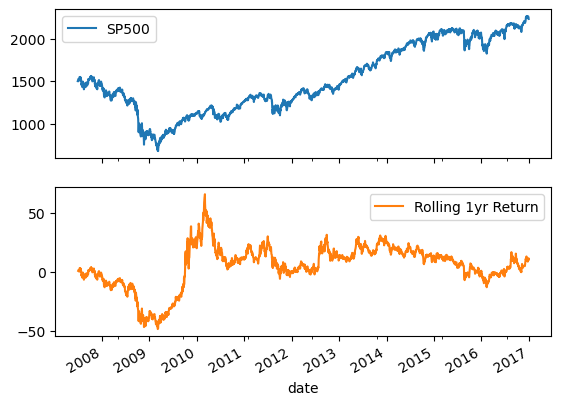

In [5]:

# Plot rolling annual returns %
data['Rolling 1yr Return'] = rolling_annual_returns.mul(100)
data.plot(subplots=True)
plt.show()